# Lab 4: NumPy Arrays
**Follow the prompts to fill in the empty code blocks and answer any bolded questions**

Rubric
- 4 points – All requested items are present. Your repository contains a complete version of this .ipynb file.
- 3 points – Some of the requested items are missing.
- 2 points – Missing or incomplete. Student should re-attempt.

[NumPy Reference](https://numpy.org/doc/stable/reference/index.html)

# Manipulating arrays with NumPy
For this part of the assignment, use what you know about NumPy to manipulate arrays.

### Trimming 0's
When we are creating our own data or scraping it, there is a lot of extra stuff you have to sift through to find the data you are actually looking for. Imagine you host a payment processing service that people submit their credit card numbers to for processing. You can imagine all of nothing your system will collect as it waits for a payment to come through. Since NumPy is a library built for making lists more efficient, it has multiple ways to remove extraneous data.

Read the fake traffic from `traffic.txt` from your program and use the `trim_zeros()` to isolate the "credit cards" numbers. Assume none of the numbers will start an end with zero. Print out all of the numbers once you find them.

# Image Processing with NumPy
For this part of the assignment, use what you know about NumPy and 2D lists to manipulate images.

### Loading an image
To load the image into the program, first we need to import both NumPy and Matplotlib. Then load the image with `imread()`. You will want to just a JPG, not a PNG.

In [1]:
import numpy as np
import matplotlib.pylab as plt

image = plt.imread("duck.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'duck.jpg'

If we print out the image what do we see? **What data type is our output? What do the values mean?**

In [ ]:
#2D array of RGB values
print(image)

[[[109 103  79]
  [108 102  78]
  [109 103  79]
  ...
  [133 123  96]
  [133 124  95]
  [132 123  94]]

 [[108 102  78]
  [110 104  80]
  [108 102  78]
  ...
  [135 125  98]
  [134 124  97]
  [131 122  93]]

 [[108 102  78]
  [108 102  78]
  [109 103  79]
  ...
  [134 124  97]
  [132 122  95]
  [132 122  95]]

 ...

 [[ 77  69  56]
  [ 85  78  62]
  [ 91  84  68]
  ...
  [138 135 100]
  [136 133  98]
  [128 125  90]]

 [[ 81  73  60]
  [ 86  79  63]
  [ 89  82  66]
  ...
  [141 138 103]
  [135 132  97]
  [127 124  89]]

 [[ 82  74  61]
  [ 85  78  62]
  [ 92  85  69]
  ...
  [139 136 101]
  [131 128  93]
  [124 121  86]]]


If we want to see the image, we need to use `imshow()` instead.

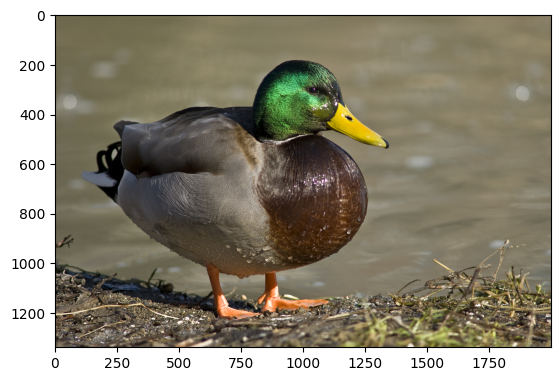

In [ ]:
imgplot = plt.imshow(image)

### Cropping an image
After loading the image, we can exploit how it is stored. How can we use splicing of NumPy arrays to crop the image? 

Display the dimensions of your image with `shape()`. Then crop your photo to the 50 by 50 pixels in the top right corner and display it.

Image Dimensions: 2000 by 1339


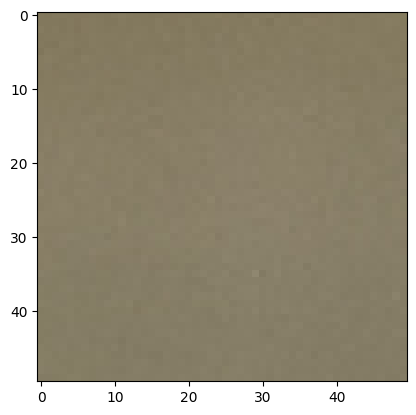

In [ ]:
print(f"Image Dimensions: {np.shape(image)[1]} by {np.shape(image)[0]}")
crop_img = image[:50,1950:2000,:]
imgplot = plt.imshow(crop_img)

### Image rotation
Using your knowledge of 2D lists, not NumPy functions, rotate the image 90 degrees counterclockwise.

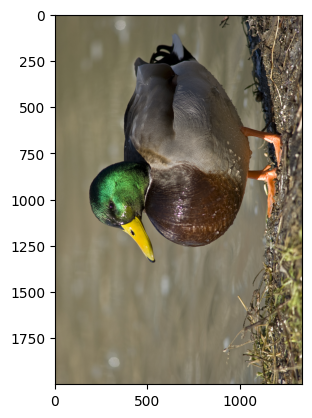

In [ ]:
rotated_img = []
for i in range(len(image[0])):
    rotated_img.append([])

for i in range(len(image[0])):
    for j in range(len(image)):
        rotated_img[i].append([0,0,0])

for i in range(len(image[0])):
    for j in range(len(image)):
        rotated_img[i][j] = image[j][i]

plt.imshow(rotated_img)


We can accomplish the same task by using NumPy's `rot90()` function. Use `rot90()` to rotate your image 270 degrees and the `flipud()` function to flip it vertically. (You can also use `fliplr()` to flip it horizontally)

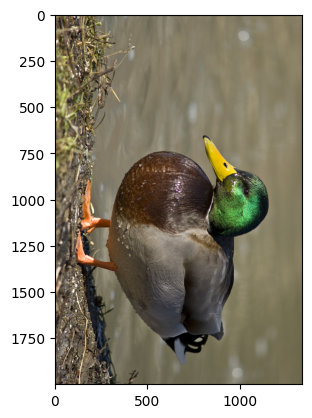

In [ ]:
rotated_image = np.rot90(image, 3)
flipped_image = np.flipud(rotated_image)
plt.imshow(flipped_image)

What if we wanted to flip the image over the diagonal? We can use `swapaxis()`.

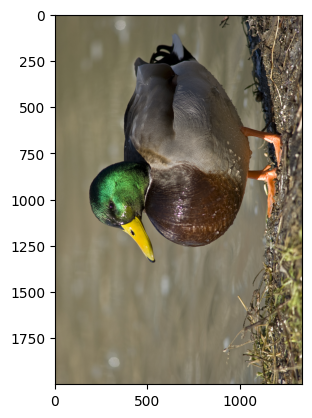

In [ ]:
flip_diag = np.swapaxes(image, 0, 1)
plt.imshow(flip_diag)

### Resizing images
NumPy does have a resize function, but it is not going to manipulate the image the way we want. The easiest way to shrink an image is to just get every 2nd pixel(to reduce the image by a factor of 2) to to get every 3rd pixel(to reduce the image by a factor of 3), etc. *Hint: use slicing for this!*

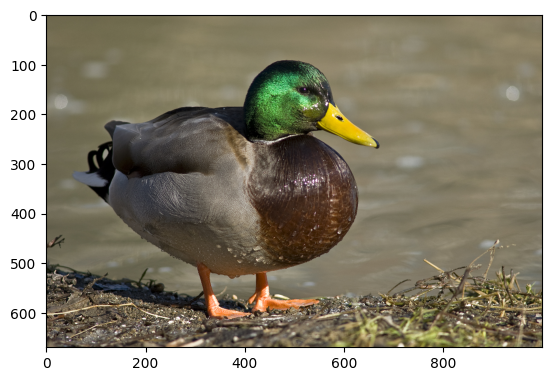

In [ ]:
resized_image = image[::2, ::2]
plt.imshow(resized_image)

## Other image processing applications of NumPy
Look through the following examples of other image processing applications. These are outside of the scope of what you need to understand about NumPy amd Matplotlib but are valuable examples to look through anyway.

### Color separation
Since every pixel is repsented by RGB values, we can separate and display the red, green, and blue color values of the image.

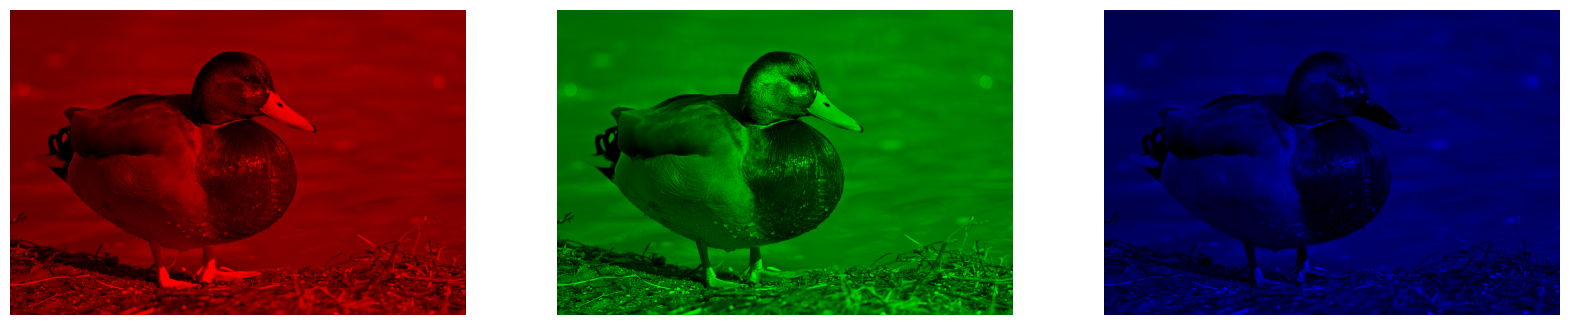

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
 
for c, ax in zip(range(3), axs):
    rgb_img = np.zeros(image.shape, dtype="uint8")
    rgb_img[:,:,c] = image[:,:,c]
    ax.imshow(rgb_img)
    ax.set_axis_off()

### Grayscale conversion
We can also use NumPy for transforming the image into a grayscale image. By separating our photo into the red, green, and blue color values like we did in the last example, we can create a weighted average to build a grayscale version of the image. 

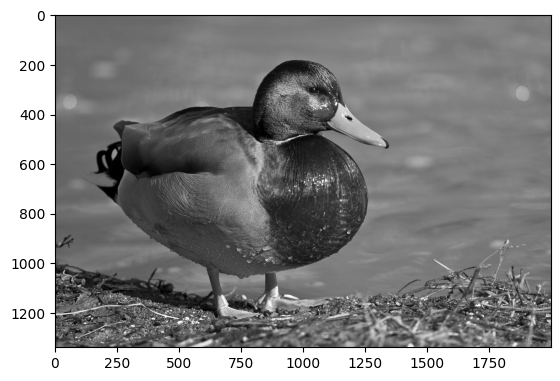

In [ ]:
r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

plt.imshow(gray, cmap='gray')

### *Challenge(Optional)*
*Check out the color transformations and image segmentation examples from this [source](https://analyticsindiamag.com/a-beginners-guide-to-image-processing-using-numpy/) on your image.*

# Build a checkerboard

Create and display two 20 by 20 images of different solid colors. *Hint, look into what NumPy creation functions exist.*


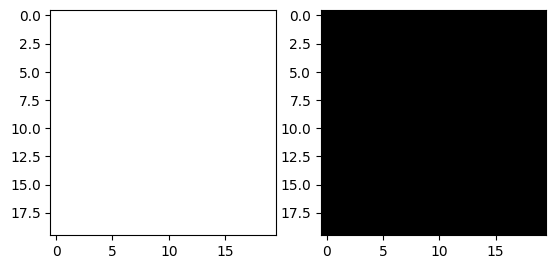

In [ ]:
img1 = np.full((20,20,3), [255,255,255])
img2 = np.full((20,20,3), [0,0,0])

#Use the following lines to display your color arrays called img1 and img2
fig, axs = plt.subplots(1,2)
axs[0].imshow(img1)
axs[1].imshow(img2)


Using splitting functions like `vsplit()` and `hsplit()` and stacking functions like `column_stack()` and `row_stack()`, turn your arrays into a checkerboard. You can make the tiles of any size. Again, please refer to this documentation to help you [NumPy Reference](https://numpy.org/doc/stable/reference/index.html).


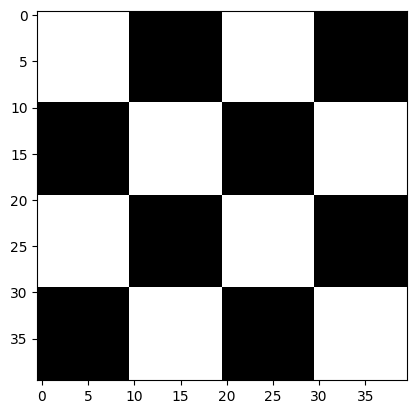

In [ ]:

w = np.hsplit(img1, 2)
b = np.hsplit(img2, 2)
w_1, w_2 = w
b_1, b_2 = b

cols1 = np.column_stack((w_1, b_1))
cols2 = np.column_stack((b_2, w_2))
cols = np.row_stack((cols1, cols2))

rows = np.vsplit(cols,4)
r_1, r_2, r_3, r_4 = rows
check = np.row_stack((r_1, r_3, r_2, r_4))

checkerboard = np.column_stack((check, check))
plt.imshow(checkerboard)
